In [8]:
from matminer.data_retrieval.retrieve_MP import MPDataRetrieval

In [9]:
mpdr = MPDataRetrieval(api_key='DhByIxvSbEdOt7p6')

In [10]:
df = mpdr.get_dataframe(criteria={"nelements": 1}, properties=['density', 'pretty_formula'])
print("There are {} entries on MP with 1 element".format(df['density'].count()))

100%|██████████| 716/716 [00:00<00:00, 723.96it/s]

There are 716 entries on MP with 1 element


In [13]:
df.head()

,density,pretty_formula
material_id,,
mp-1,1.935039,Cs
mp-10,6.064410,As
mp-100,13.343942,Hf
mp-10018,8.305513,Ac
mp-10021,6.092337,Ga


In [14]:
df = mpdr.get_dataframe({"band_gap": {"$gt": 4.0}}, ['pretty_formula', 'band_gap'])

100%|██████████| 8285/8285 [00:07<00:00, 1081.10it/s]


In [15]:
print("There are {} entries on MP with a band gap larger than 4.0".format(df['band_gap'].count()))

There are 8285 entries on MP with a band gap larger than 4.0


In [16]:
df.to_csv('ss.csv')

In [17]:
df = mpdr.get_dataframe({"elasticity": {"$exists": True}, "elasticity.warnings": []},
                        ['pretty_formula', 'elasticity.K_VRH', 'elasticity.G_VRH'])

100%|██████████| 8073/8073 [00:09<00:00, 838.58it/s] 


In [18]:
print("There are {} elastic entries on MP with no warnings".format(df['elasticity.K_VRH'].count()))

There are 8073 elastic entries on MP with no warnings


In [19]:
df.describe()

,elasticity.K_VRH,elasticity.G_VRH
count,8073.000000,8073.000000
mean,111.460671,54.143317
std,77.298297,45.109616
min,2.000000,2.000000
25%,47.000000,22.000000
50%,98.000000,42.000000
75%,162.000000,75.000000
max,575.000000,525.000000


In [21]:
df = mpdr.get_dataframe(criteria={"elasticity": {"$exists": True},
                         "elasticity.warnings": [],
                         "elements": {"$all": ["Pb", "Te"]},
                         "e_above_hull": {"$lt": 1e-6}}, # to limit the number of hits for the sake of time
                        properties = ["elasticity.K_VRH", "elasticity.G_VRH", "pretty_formula",
                                      "e_above_hull", "bandstructure", "dos"])

In [22]:
print("There are {} elastic entries on MP with no warnings that contain "
      "Pb and Te with energy above hull ~ 0.0 eV".format(df['elasticity.K_VRH'].count()))

There are 3 elastic entries on MP with no warnings that contain Pb and Te with energy above hull ~ 0.0 eV


In [23]:
df.head()

,elasticity.K_VRH,elasticity.G_VRH,pretty_formula,e_above_hull,bandstructure,dos
material_id,,,,,,
mp-19717,40.0,24.0,TePb,0,<pymatgen.electronic_structure.bandstructure.B...,Complete DOS for Full Formula (Te1 Pb1)\nReduc...
mp-20740,25.0,13.0,Tl4Te3Pb,0,<pymatgen.electronic_structure.bandstructure.B...,Complete DOS for Full Formula (Tl8 Te6 Pb2)\nR...
mp-605028,34.0,16.0,Te2Pd3Pb2,0,<pymatgen.electronic_structure.bandstructure.B...,Complete DOS for Full Formula (Te4 Pd6 Pb4)\nR...


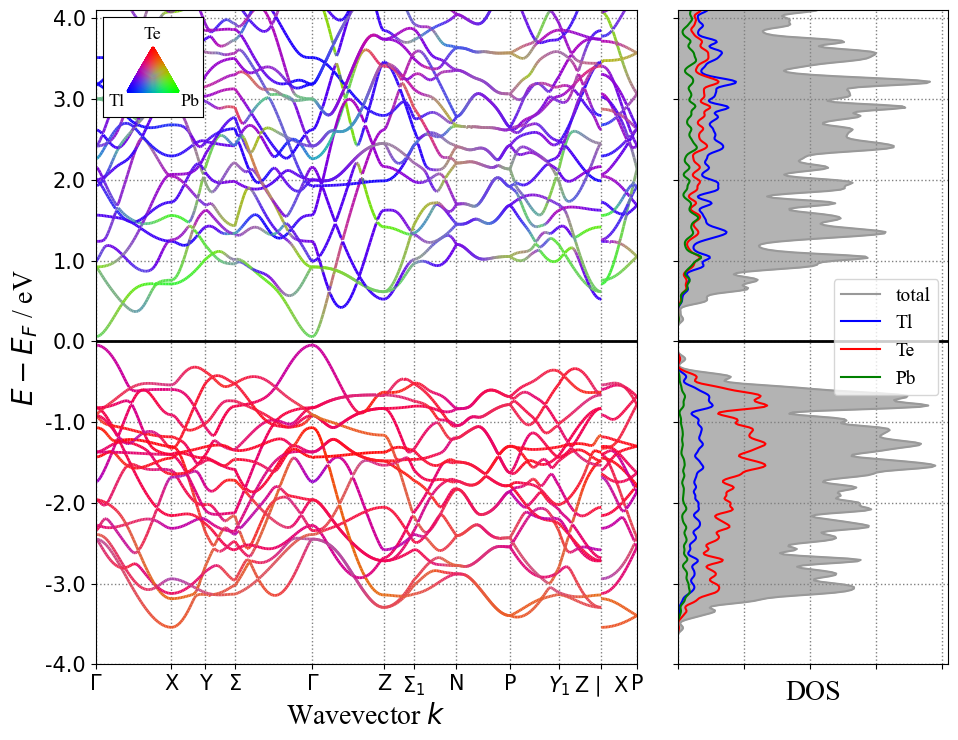

In [24]:
%matplotlib inline
from pymatgen.electronic_structure.plotter import BSDOSPlotter

mpid = 'mp-20740'
idx = df.index[df.index==mpid][0]
plt = BSDOSPlotter().get_plot(bs=df.loc[idx, 'bandstructure'], dos=df.loc[idx, 'dos']);
plt.show()